# **Data Customer Study Notebook**

## Objectives

* Answer business requirement 1:
  * The client is interested in discovering how house attributes correlate with sale prices. Therefore, the client expects data visualizations of the correlated variables against the sale price.

## Inputs

* outputs/datasets/collection/house_price_records.csv 

## Outputs

* General code that answers business requirement 1 and can be used to build the Streamlit App

---

# Change working directory

In [1]:
import numpy
import os

In [2]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues/jupyter_notebooks'

Change the working directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing-issues'

---

# Load Data

In [7]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/cleaned/HousePricesRecordsCleaned.csv")
df.head(5)

SyntaxError: invalid syntax (2719409511.py, line 3)

## Data Exploration

*Checking variable type and distribution, missing levels and what these variables mean in a business context*

In [7]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Correlation Study

*Variables are already int or float therefore there is not need to user OneHotEncoder*

*I use .corr() for spearman and pearson methods, and investigate the top 10 correlations*

In [8]:
corr_spearman = df.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual     0.809829
GrLivArea       0.731310
KitchenQual     0.672849
YearBuilt       0.652682
GarageArea      0.649379
GarageFinish    0.636076
TotalBsmtSF     0.602725
GarageYrBlt     0.593788
1stFlrSF        0.575408
YearRemodAdd    0.571159
Name: SalePrice, dtype: float64

In [9]:
corr_pearson = df.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_pearson

OverallQual     0.790982
GrLivArea       0.708624
KitchenQual     0.659600
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GarageFinish    0.544382
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
Name: SalePrice, dtype: float64

*I use 5 variables with the higehst correlation for further investigation*

In [10]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt'}

I will investigate if
* How GarageArea affects the SalePrice
* How GrLivArea affects the SalePrice
* How KitchenQual affects the SalePrice
* How OverallQual affects the SalePrice
* How TotalBsmtSF affects the SalePrice
* How YearBuilt affects the SalePrice
  
NOTICE: I got 6 variables instead of 5

In [11]:
vars_to_study = ['GarageArea', 'GrLivArea', 'KitchenQual', 'OverallQual', 'TotalBsmtSF', 'YearBuilt']
vars_to_study

['GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt']

### EDA on Selected variables

In [12]:
df_eda = df.filter(vars_to_study + ['SalePrice'])
df_eda.head()

GarageArea  GrLivArea  KitchenQual  OverallQual  TotalBsmtSF  YearBuilt  \
0         548       1710            3            7          856       2003   
1         460       1262            2            6         1262       1976   
2         608       1786            3            7          920       2001   
3         642       1717            3            7          756       1915   
4         836       2198            3            8         1145       2000   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

#### Variables Distribution by SalePrice

*I plot the distrubution colored by SalePrice*

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

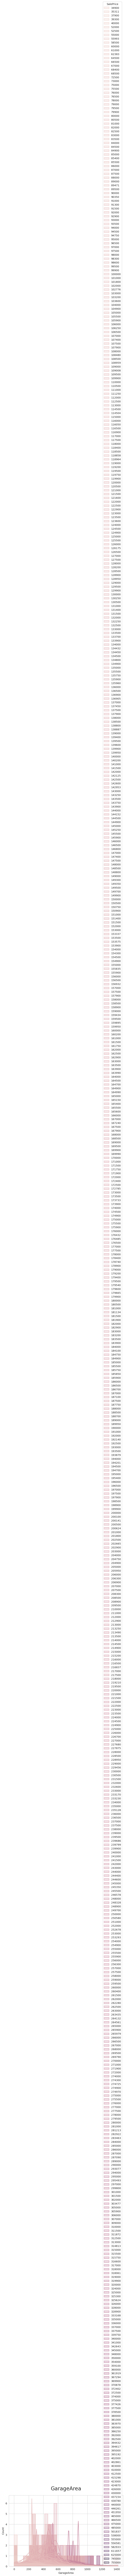

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

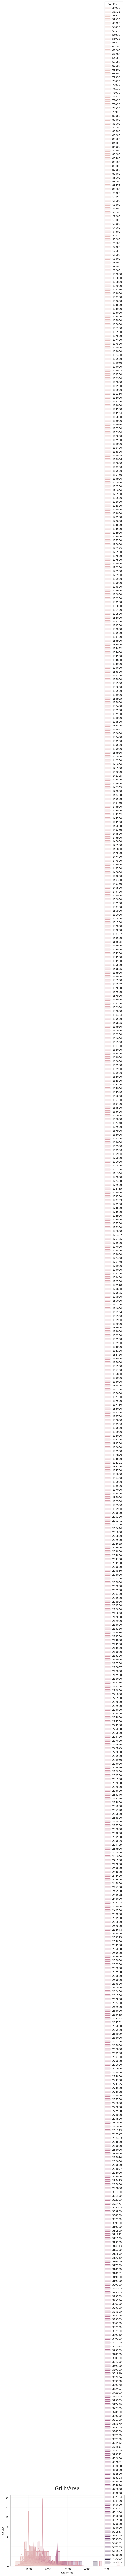

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

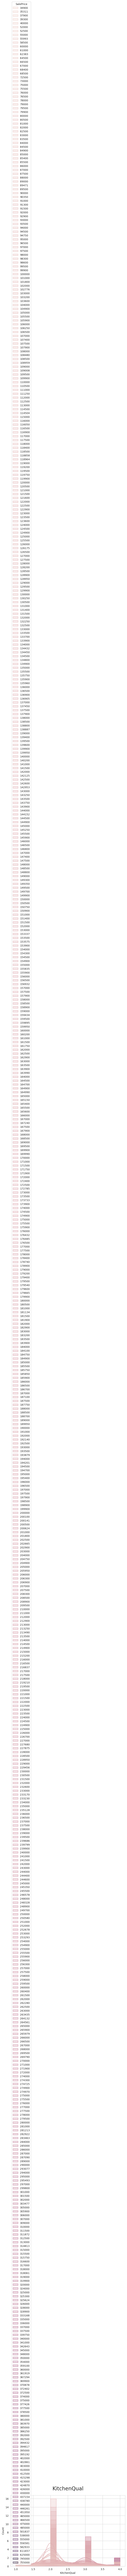

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

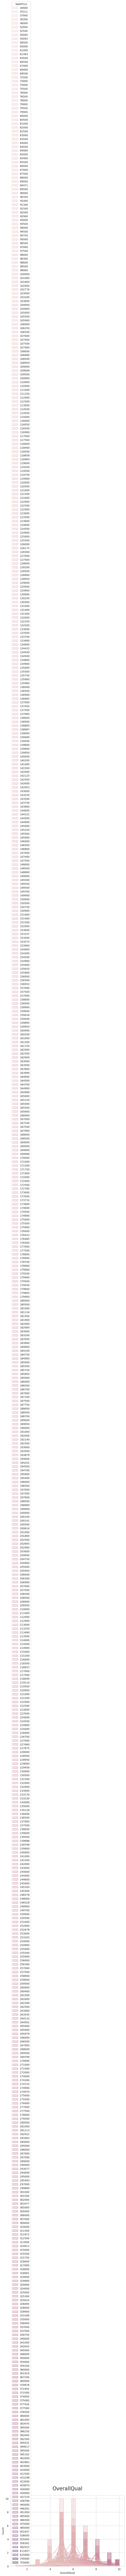

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

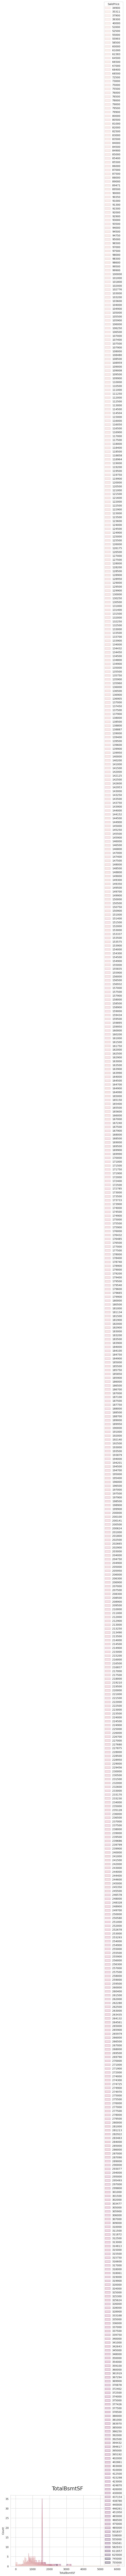

/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/codeany/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance;

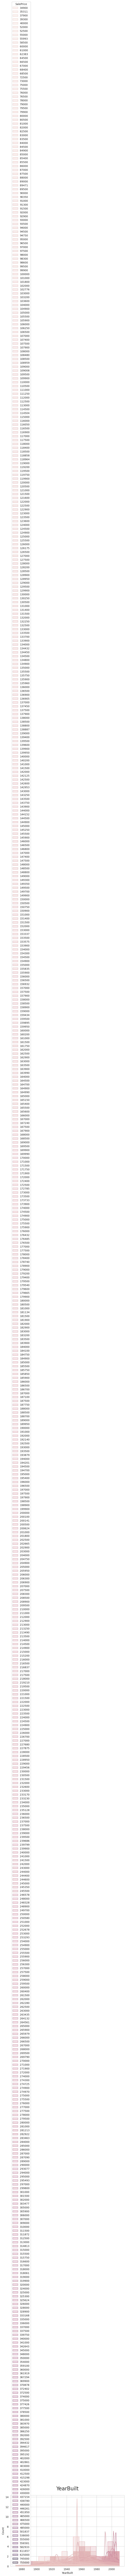

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12,5))
    sns.countplot(data=df, x=col, hue=target_var,order = df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20,y=1.05)
    plt.show()

def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True,element="step")
    plt.title(f"{col}", fontsize=20,y=1.05)
    plt.show()

target_var = 'SalePrice'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

# Parellel Plot

*Create a separate DataFrame and transform GarageArea (numerical) into bins (categorical) for visualising at parallel_categories() plot*

In [13]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
GarageArea_map = [-np.Inf, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, np.Inf]
SalePrice_map = [-np.Inf, 35000, 70000, 105000, 140000, 175000, 210000, 245000, 280000, 315000, 350000, 385000, 415000, 450000, 485000, 515000, 550000, 585000, 615000, 650000, 685000, 715000, 750000, 785000, np.Inf]
GrLivArea_map = [-np.Inf, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400, 6000, np.Inf]
TotalBsmtSF_map = [-np.Inf, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400, 6000, 6600, np.Inf]
YearBuilt_map = [-np.Inf, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, np.Inf]
disc = ArbitraryDiscretiser(binning_dict={'GarageArea':GarageArea_map, 'SalePrice':SalePrice_map, 'GrLivArea':GrLivArea_map, 'TotalBsmtSF':TotalBsmtSF_map, 'YearBuilt':YearBuilt_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()


GarageArea  GrLivArea  KitchenQual  OverallQual  TotalBsmtSF  YearBuilt  \
0           5          2            3            7            1         13   
1           4          2            2            6            2         10   
2           6          2            3            7            1         13   
3           4          2            2            5            1         12   
4           6          2            3            8            2         13   

   SalePrice  
0          5  
1          5  
2          6  
3          4  
4          8

In [14]:
disc.binner_dict_['GarageArea']

[-inf,
 100,
 200,
 300,
 400,
 500,
 600,
 700,
 800,
 900,
 1000,
 1100,
 1200,
 1300,
 1400,
 1500,
 inf]

In [15]:
disc.binner_dict_['SalePrice']

[-inf,
 35000,
 70000,
 105000,
 140000,
 175000,
 210000,
 245000,
 280000,
 315000,
 350000,
 385000,
 415000,
 450000,
 485000,
 515000,
 550000,
 585000,
 615000,
 650000,
 685000,
 715000,
 750000,
 785000,
 inf]

In [16]:
disc.binner_dict_['GrLivArea']

[-inf, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400, 6000, inf]

In [17]:
disc.binner_dict_['TotalBsmtSF']

[-inf, 600, 1200, 1800, 2400, 3000, 3600, 4200, 4800, 5400, 6000, 6600, inf]

In [18]:
disc.binner_dict_['YearBuilt']

[-inf,
 1880,
 1890,
 1900,
 1910,
 1920,
 1930,
 1940,
 1950,
 1960,
 1970,
 1980,
 1990,
 2000,
 2010,
 inf]

*Create a map to replace the GarageArea variable with more informative levels.*

In [19]:
n_classes = len(GarageArea_map) - 1
classes_ranges = disc.binner_dict_['GarageArea'][1:-1]

GarageArea_labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        GarageArea_labels_map[n] = f"<{classes_ranges[0]}"
    elif n == n_classes-1:
        GarageArea_labels_map[n] = f"+{classes_ranges[-1]}"
    else:
        GarageArea_labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"

GarageArea_labels_map

{0: '<100',
 1: '100 to 200',
 2: '200 to 300',
 3: '300 to 400',
 4: '400 to 500',
 5: '500 to 600',
 6: '600 to 700',
 7: '700 to 800',
 8: '800 to 900',
 9: '900 to 1000',
 10: '1000 to 1100',
 11: '1100 to 1200',
 12: '1200 to 1300',
 13: '1300 to 1400',
 14: '1400 to 1500',
 15: '+1500'}

In [20]:
n_classes = len(SalePrice_map) - 1
classes_ranges = disc.binner_dict_['SalePrice'][1:-1]

SalePrice_labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        SalePrice_labels_map[n] = f"<{classes_ranges[0]}"
    elif n == n_classes-1:
        SalePrice_labels_map[n] = f"+{classes_ranges[-1]}"
    else:
        SalePrice_labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"

SalePrice_labels_map

{0: '<35000',
 1: '35000 to 70000',
 2: '70000 to 105000',
 3: '105000 to 140000',
 4: '140000 to 175000',
 5: '175000 to 210000',
 6: '210000 to 245000',
 7: '245000 to 280000',
 8: '280000 to 315000',
 9: '315000 to 350000',
 10: '350000 to 385000',
 11: '385000 to 415000',
 12: '415000 to 450000',
 13: '450000 to 485000',
 14: '485000 to 515000',
 15: '515000 to 550000',
 16: '550000 to 585000',
 17: '585000 to 615000',
 18: '615000 to 650000',
 19: '650000 to 685000',
 20: '685000 to 715000',
 21: '715000 to 750000',
 22: '750000 to 785000',
 23: '+785000'}

In [21]:
n_classes = len(GrLivArea_map) - 1
classes_ranges = disc.binner_dict_['GrLivArea'][1:-1]

GrLivArea_labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        GrLivArea_labels_map[n] = f"<{classes_ranges[0]}"
    elif n == n_classes-1:
        GrLivArea_labels_map[n] = f"+{classes_ranges[-1]}"
    else:
        GrLivArea_labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"

GrLivArea_labels_map

{0: '<600',
 1: '600 to 1200',
 2: '1200 to 1800',
 3: '1800 to 2400',
 4: '2400 to 3000',
 5: '3000 to 3600',
 6: '3600 to 4200',
 7: '4200 to 4800',
 8: '4800 to 5400',
 9: '5400 to 6000',
 10: '+6000'}

In [22]:
n_classes = len(TotalBsmtSF_map) - 1
classes_ranges = disc.binner_dict_['TotalBsmtSF'][1:-1]

TotalBsmtSF_labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        TotalBsmtSF_labels_map[n] = f"<{classes_ranges[0]}"
    elif n == n_classes-1:
        TotalBsmtSF_labels_map[n] = f"+{classes_ranges[-1]}"
    else:
        TotalBsmtSF_labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"

TotalBsmtSF_labels_map

{0: '<600',
 1: '600 to 1200',
 2: '1200 to 1800',
 3: '1800 to 2400',
 4: '2400 to 3000',
 5: '3000 to 3600',
 6: '3600 to 4200',
 7: '4200 to 4800',
 8: '4800 to 5400',
 9: '5400 to 6000',
 10: '6000 to 6600',
 11: '+6600'}

In [23]:
n_classes = len(YearBuilt_map) - 1
classes_ranges = disc.binner_dict_['YearBuilt'][1:-1]

YearBuilt_labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        YearBuilt_labels_map[n] = f"<{classes_ranges[0]}"
    elif n == n_classes-1:
        YearBuilt_labels_map[n] = f"+{classes_ranges[-1]}"
    else:
        YearBuilt_labels_map[n] = f"{classes_ranges[n-1]} to {classes_ranges[n]}"

YearBuilt_labels_map

{0: '<1880',
 1: '1880 to 1890',
 2: '1890 to 1900',
 3: '1900 to 1910',
 4: '1910 to 1920',
 5: '1920 to 1930',
 6: '1930 to 1940',
 7: '1940 to 1950',
 8: '1950 to 1960',
 9: '1960 to 1970',
 10: '1970 to 1980',
 11: '1980 to 1990',
 12: '1990 to 2000',
 13: '2000 to 2010',
 14: '+2010'}

*Replace using .replace()*

In [24]:
df_parallel['GarageArea'] = df_parallel['GarageArea'].replace(GarageArea_labels_map)
df_parallel['SalePrice'] = df_parallel['SalePrice'].replace(SalePrice_labels_map)
df_parallel['GrLivArea'] = df_parallel['GrLivArea'].replace(GrLivArea_labels_map)
df_parallel['TotalBsmtSF'] = df_parallel['TotalBsmtSF'].replace(TotalBsmtSF_labels_map)
df_parallel['YearBuilt'] = df_parallel['YearBuilt'].replace(YearBuilt_labels_map)
df_parallel.head()

GarageArea     GrLivArea  KitchenQual  OverallQual   TotalBsmtSF  \
0  500 to 600  1200 to 1800            3            7   600 to 1200   
1  400 to 500  1200 to 1800            2            6  1200 to 1800   
2  600 to 700  1200 to 1800            3            7   600 to 1200   
3  400 to 500  1200 to 1800            2            5   600 to 1200   
4  600 to 700  1200 to 1800            3            8  1200 to 1800   

      YearBuilt         SalePrice  
0  2000 to 2010  175000 to 210000  
1  1970 to 1980  175000 to 210000  
2  2000 to 2010  210000 to 245000  
3  1990 to 2000  140000 to 175000  
4  2000 to 2010  280000 to 315000

*Creates multi-dimensional categorical data plot*

In [25]:
import plotly.express as px
fig = px.parallel_categories(df_parallel, color="SalePrice")
fig.show()

ValueError: 
    Invalid element(s) received for the 'color' property of parcats.line
        Invalid elements include: ['175000 to 210000', '175000 to 210000', '210000 to 245000', '140000 to 175000', '280000 to 315000', '105000 to 140000', '105000 to 140000', '105000 to 140000', '245000 to 280000', '105000 to 140000']

    The 'color' property is a color and may be specified as:
      - A hex string (e.g. '#ff0000')
      - An rgb/rgba string (e.g. 'rgb(255,0,0)')
      - An hsl/hsla string (e.g. 'hsl(0,100%,50%)')
      - An hsv/hsva string (e.g. 'hsv(0,100%,100%)')
      - A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen
      - A number that will be interpreted as a color
        according to parcats.line.colorscale
      - A list or array of any of the above

---

# Correlation and PPS Analyses

Calculate Correlations and Power Predictive Score

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df_house_price_records, threshold, figsize=(20, 12), font_annot=8):
    if len(df_house_price_records.columns) > 1:
        mask = np.zeros_like(df_house_price_records, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df_house_price_records) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df_house_price_records, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df_house_price_records.columns, rotation=0)
        plt.ylim(len(df_house_price_records.columns), 0)
        plt.show()


def heatmap_pps(df_house_price_records, threshold, figsize=(20, 12), font_annot=8):
    if len(df_house_price_records.columns) > 1:
        mask = np.zeros_like(df_house_price_records, dtype=np.bool)
        mask[abs(df_house_price_records) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df_house_price_records, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df_house_price_records.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df_house_price_records):
    df_corr_spearman = df_house_price_records.corr(method="spearman")
    df_corr_pearson = df_house_price_records.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df_house_price_records)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df_house_price_records=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df_house_price_records=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df_house_price_records=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

In [ ]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df_house_price_records)

In [ ]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

# Conclusions and Next Steps

The correlations and plots interpretation converge.

*A higher SalePrice typically has GarageArea bigger than ....